# Comparison between L2 and L1 (Lasso) regularization

## Import libreries and define global variables

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [19]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [20]:
df = get_data(f'{DIR}data/MONK/monks-3.train')
df_test = get_data(f'{DIR}data/MONK/monks-3.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [21]:
test_frac = 1/4

In [22]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round(test_frac * df.shape[1])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [23]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [24]:
preprocessing = 0

In [25]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [35]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'sigm',
        'eta': 0.05,
        'lam': 0.0002,
        'alpha': 0.2,
        'n_batch': 97,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

### L2 regularization

Build model

In [36]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training with L2 regularization:

In [37]:
params['l1_reg'] = False
history_l2 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 7.028e-01, val_loss: 7.417e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.547e-01, val_MSE: 2.738e-01  lr : 0.05
Epoch 1: train_loss: 7.019e-01, val_loss: 7.401e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.543e-01, val_MSE: 2.730e-01  lr : 0.05
Epoch 2: train_loss: 7.011e-01, val_loss: 7.384e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.539e-01, val_MSE: 2.722e-01  lr : 0.05
Epoch 3: train_loss: 7.004e-01, val_loss: 7.368e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.535e-01, val_MSE: 2.715e-01  lr : 0.05
Epoch 4: train_loss: 6.997e-01, val_loss: 7.353e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.532e-01, val_MSE: 2.707e-01  lr : 0.05
Epoch 5: train_loss: 6.990e-01, val_loss: 7.339e-01; train_accuracy: 5.258e+01, val_accuracy: 4.400e+01  train_MSE: 2.529e-01, val_MSE: 2.701e-01  lr : 0.05
Epoch 6: train_loss: 6.984e-01, val_loss: 7.326e-01; train

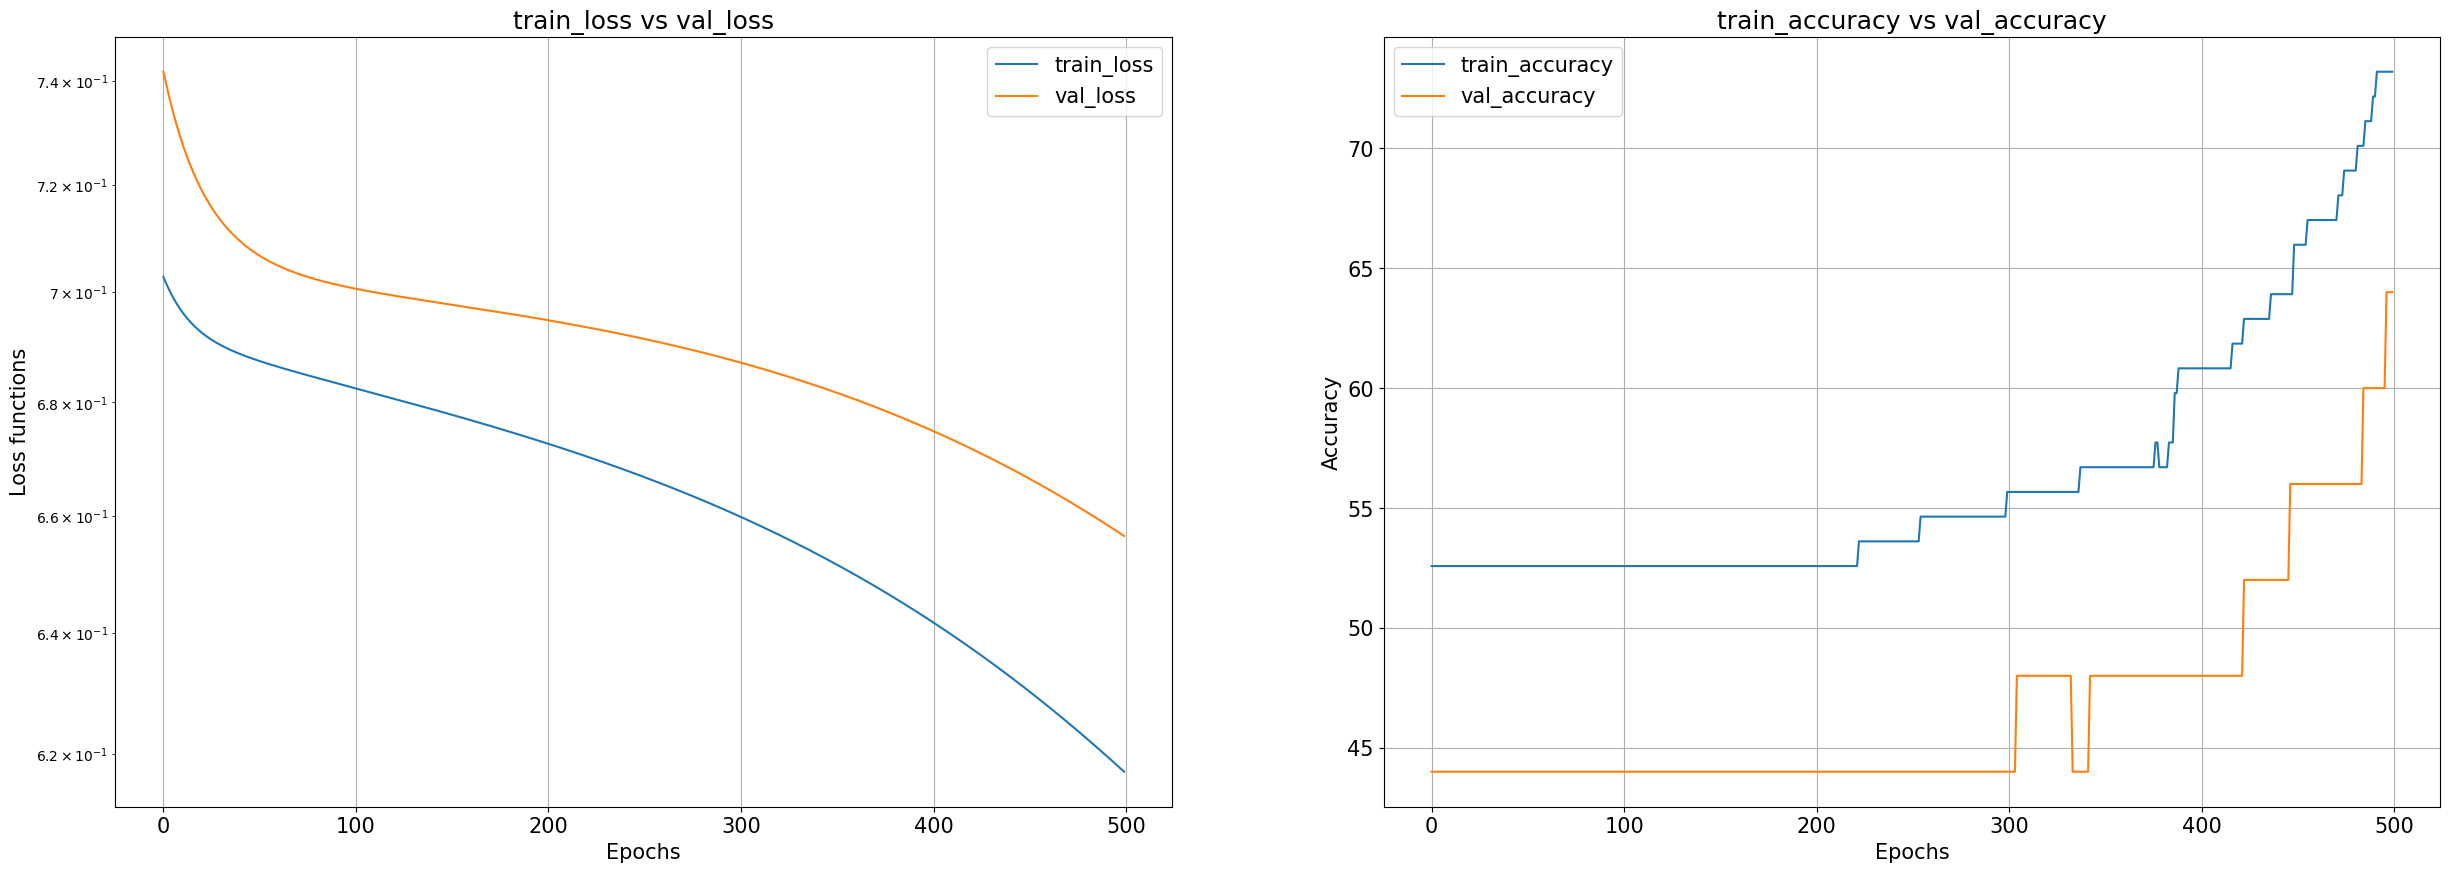

In [38]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'],label='train_loss')
plt.plot(history_l2['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_accuracy'],label='train_accuracy')
plt.plot(history_l2['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### L1 regularization


Build model


In [39]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with L1 regularization:


In [40]:
params['l1_reg'] = True
history_l1 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.881e-01, val_loss: 8.002e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.474e-01, val_MSE: 3.025e-01  lr : 0.05
Epoch 1: train_loss: 6.877e-01, val_loss: 7.984e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.473e-01, val_MSE: 3.016e-01  lr : 0.05
Epoch 2: train_loss: 6.874e-01, val_loss: 7.965e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.471e-01, val_MSE: 3.007e-01  lr : 0.05
Epoch 3: train_loss: 6.871e-01, val_loss: 7.947e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.470e-01, val_MSE: 2.999e-01  lr : 0.05
Epoch 4: train_loss: 6.868e-01, val_loss: 7.930e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.468e-01, val_MSE: 2.990e-01  lr : 0.05
Epoch 5: train_loss: 6.865e-01, val_loss: 7.913e-01; train_accuracy: 5.567e+01, val_accuracy: 3.200e+01  train_MSE: 2.467e-01, val_MSE: 2.983e-01  lr : 0.05
Epoch 6: train_loss: 6.863e-01, val_loss: 7.897e-01; train

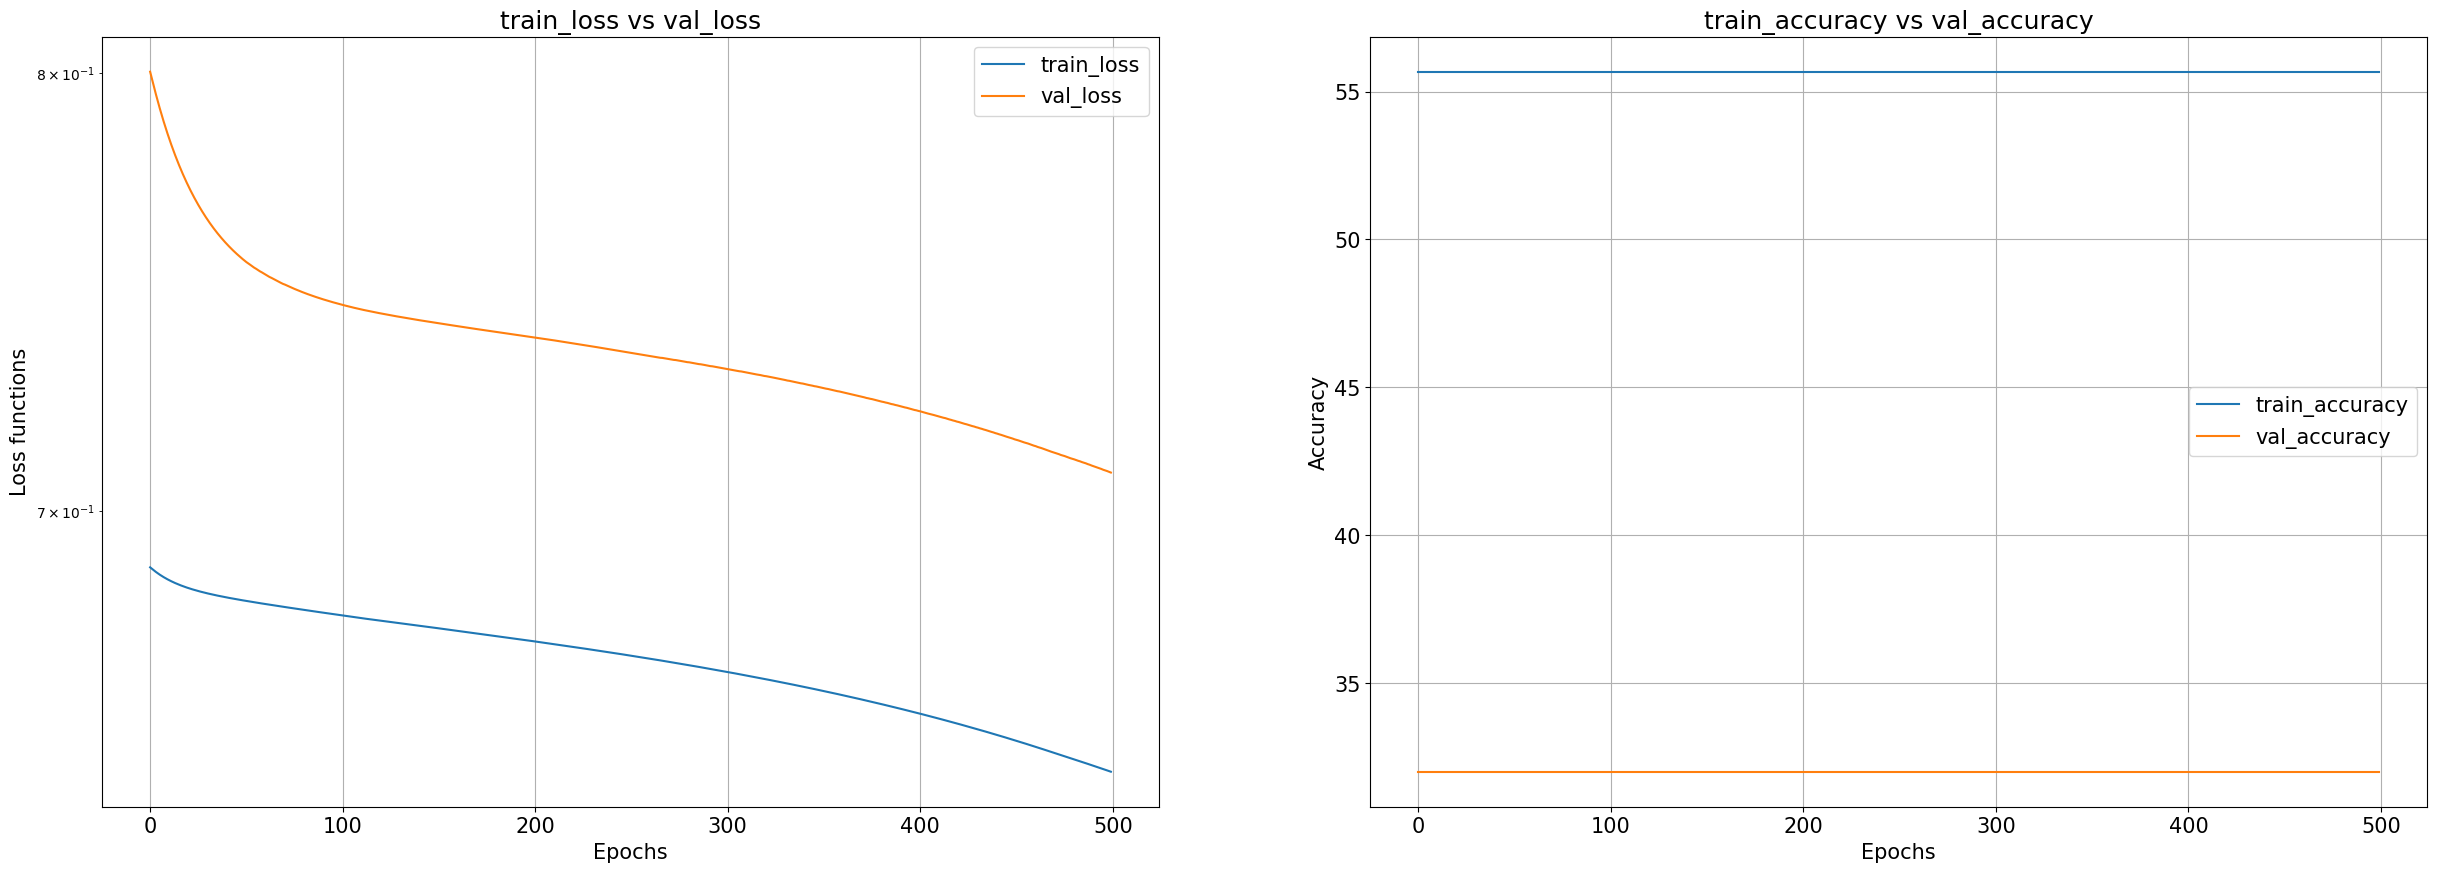

In [41]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l1['train_loss'],label='train_loss')
plt.plot(history_l1['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l1['train_accuracy'],label='train_accuracy')
plt.plot(history_l1['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

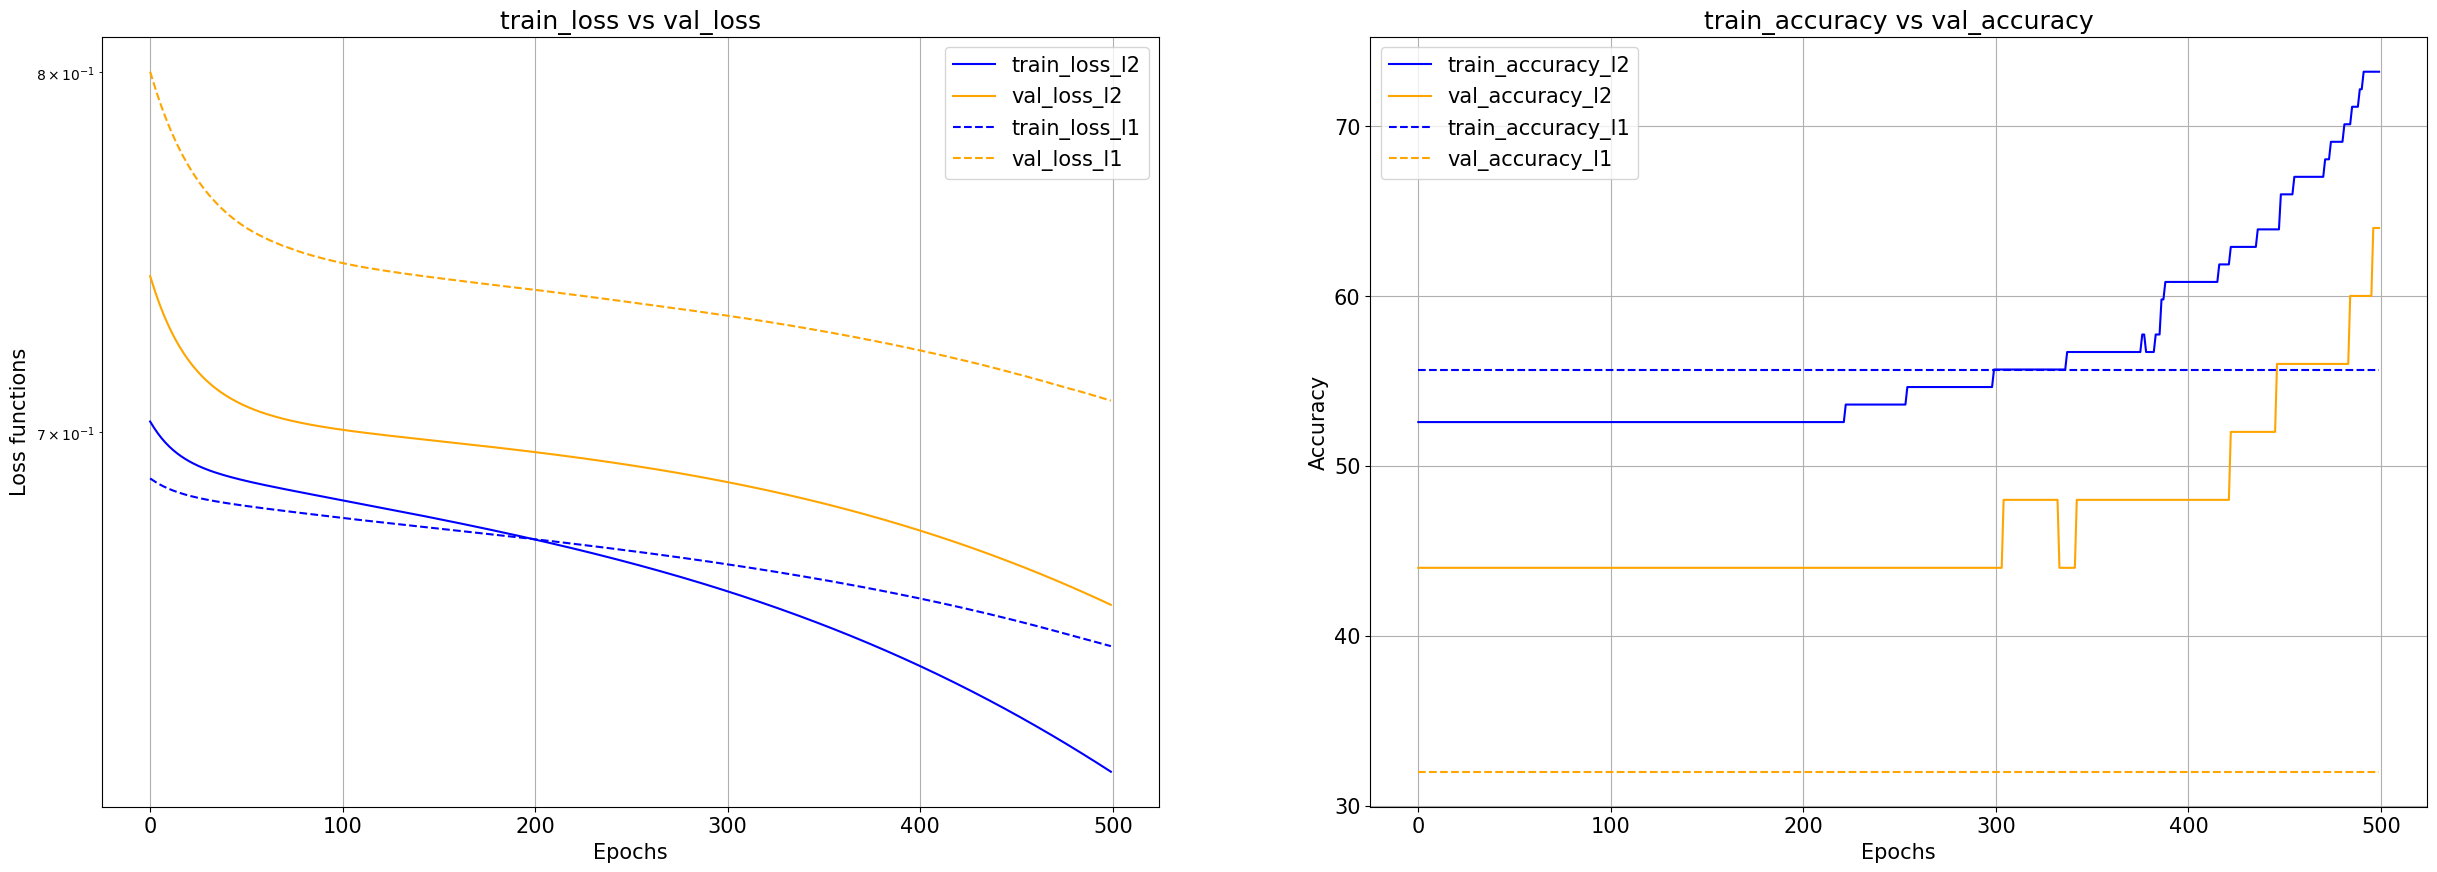

In [42]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'], '-', label='train_loss_l2', color='blue')
plt.plot(history_l2['val_loss'], '-', label='val_loss_l2', color='orange')
plt.plot(history_l1['train_loss'], '--', label='train_loss_l1', color='blue')
plt.plot(history_l1['val_loss'], '--', label='val_loss_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_accuracy'], '-',label='train_accuracy_l2', color='blue')
plt.plot(history_l2['val_accuracy'], '-', label='val_accuracy_l2', color='orange')
plt.plot(history_l1['train_accuracy'], '--', label='train_accuracy_l1', color='blue')
plt.plot(history_l1['val_accuracy'], '--', label='val_accuracy_l1', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)